# Dowloads and Installs

# train

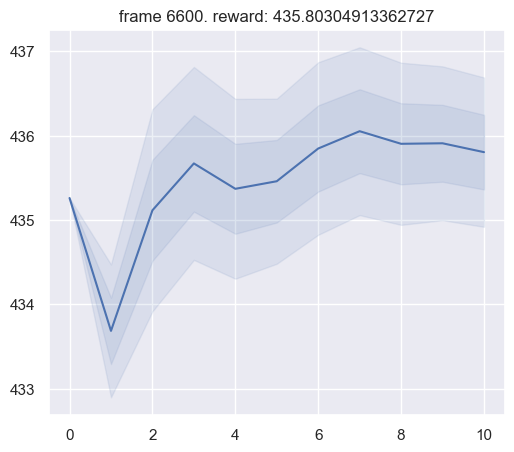

Episode: 12 || Reward: 433 || Final State  6


KeyboardInterrupt: 

In [1]:
from experiments import *
import seaborn as sns
sns.set_theme()
# 类的相关写法，里面包含了很多的 agent 部分

experiment = PB_Learn(max_frames=1e5) # experiment class: Markov_Learn, Noisy_Learn, Simple_Learn, different number of frames have different effects on plots
# experiment.set_agent("PPO") # agent name: DQN, DuelDDQN, Random, PPO, A2C, add parameters as kwargs

# learn 的算法就是等同于 PB_learn

experiment.set_agent("DQN") 
# 下面的语句是通过上面的 set_agent 来进行指定选择的
experiment.train() # approx 10 minutes

# 还挺快的，我的电脑 4min 就运行完毕了

# 轨迹绘制

### 测试已有数据 learning process 关键

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10, 5))
print(fig)

# 创建一个 3D 坐标系的 Axes 对象
# 就是加入其中的空坐标，有了空间信息
ax = fig.add_subplot(111, projection='3d')
print(ax)

In [ ]:
print(dir(experiment))
print(experiment.agent)
print(experiment.agent.policy_net)
print(experiment.agent.policy_net.state_dict())
print("####################")
print(experiment.agent.target_net)

# 判断 target_net 和 policy_net 是否是同一个对象
print(experiment.agent.target_net is experiment.agent.policy_net)

# print(experiment.agent.target_net.state_dict())

In [ ]:
# 利用torch 保存 policy_net 的参数
torch.save(experiment.agent.policy_net.state_dict(), "240321_policy_net.pth")
torch.save(experiment.agent.target_net.state_dict(), "240321_target_net.pth")

#### 聪明的写法
先创建类，然后单独加载权重部分

In [7]:
import learn_class as lc
dqn1 = lc.Learn()
print(dqn1)

test_path = "240321_policy_net.pth"
dqn1.set_agent("DQN", pt_file_path=test_path)
print(dqn1.agent.policy_net.state_dict())


eval 评估后的智能体： DQN
Agent set to DQN
选择加载 DQN
OrderedDict([('layer.0.weight', tensor([[-3.4013e-01, -3.3597e-01, -4.9972e-01],
        [-4.7685e-01, -1.1421e-02, -2.5261e-01],
        [-7.0290e-02,  8.5779e-02,  5.1367e-01],
        [ 3.4002e-01,  2.2512e-01, -2.1992e-01],
        [-7.9417e-01,  2.4166e-01, -1.4509e+00],
        [ 2.2066e-01,  8.2568e-02,  2.6918e-01],
        [-3.6694e-01,  2.1271e-01, -2.8967e-01],
        [-2.1742e-01,  5.0954e-01,  1.8327e-01],
        [-6.4559e-01, -1.3318e-01,  6.9198e-01],
        [-1.7327e-01, -5.3803e-01,  5.0581e-01],
        [-6.2667e-01,  3.2530e-01,  6.4107e-01],
        [-2.8447e-02, -6.9268e-01,  2.0053e-01],
        [-3.8244e-02, -4.6998e-01, -3.4816e-01],
        [ 4.3298e-02, -2.3472e-01, -1.3953e-01],
        [ 5.6617e-02,  1.0618e-01,  8.6326e-02],
        [-3.8935e-01, -4.7366e-01,  5.7414e-01],
        [-5.2378e-01, -1.2594e-01,  6.3081e-01],
        [-3.6868e-01,  3.3239e-01, -3.1098e-01],
        [-2.5093e-01, -5.2794e-02,  4.8029

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


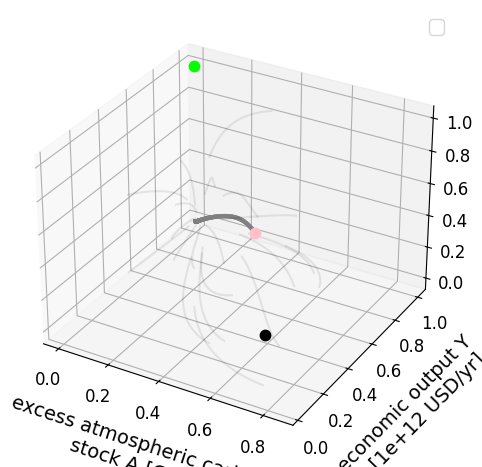

'解释：\n为什么原文中只有 20 次这么稀少，\n因为其中有个累积的结果在上面，所以只有 20 次累积 8次效果就比较好了\n\n\n'

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(subplot_kw={'projection': '3d'})
dqn1.plot_trajectory([0.5, 0.5, 0.5], start_state=[0.5, 0.5, 0.5], axes=axes)

# dqn1.plot_trajectory([0.5, 1, 0.5], axes=axes)
# self.current_state = [0.5, 0.5, 0.5]

# dqn1.plot_trajectory([0.5, 0.5, 0.5], start_state=[2, 0.5, 0.5], axes=axes)

# 在 ax3d 上图像进行添加绘制一个线
# axes.plot([0, 1], [0, 1], [0, 1], lw=4, color='red')

axes.scatter(*zip([0.5,0.5,0.5]), lw=4, color='pink')
axes.scatter(*zip([0.60,0.38,0]), lw=4, color='black')
axes.scatter(*zip([0,1,1]), lw=4, color='lime')

# A_PB = [10, 265]
# S_scale = 1e9
# Y_scale = 1e12
# axes.set_title('Sparse', fontsize=30)
# axes.plot([A_PB[0], A_PB[1]], [0, 0], [0, 0], 'k-', lw=2)
# axes.plot([0, 0], [0, 0], [0, S_scale], 'k-', lw=2)

axes.set_xlabel("\n\nexcess atmospheric carbon\nstock A [GtC]", )
axes.set_ylabel("\n\neconomic output Y \n  [%1.0e USD/yr]" % Y_scale, )
axes.set_zlabel("\n\nrenewable knowledge\nstock S [%1.0e GJ]" % S_scale, )

plt.tight_layout()

plt.legend()
# 最后再进行显示部分
plt.show()  


"""解释：
为什么原文中只有 20 次这么稀少，
因为其中有个累积的结果在上面，所以只有 20 次累积 8次效果就比较好了


"""

### 绘图的新版本

终于理解为什么要 create figure ：
因为这样可以制作相关的刻度线等一系列的细节内容

eval 评估后的智能体： DQN
Agent set to DQN
选择加载 DQN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


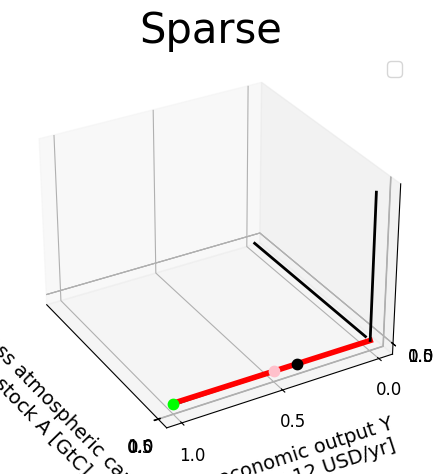

In [6]:
import learn_class as lc
dqn1 = lc.Learn()
print(dqn1)
import matplotlib.pyplot as plt
test_path = "240321_policy_net.pth"
dqn1.set_agent("DQN", pt_file_path=test_path)
# print(dqn1.agent.policy_net.state_dict())

# dqn1.plot_trajectory([0.5, 1, 0.5], axes=axes)
# self.current_state = [0.5, 0.5, 0.5]

# dqn1.plot_trajectory([0.5, 0.5, 0.5], start_state=[2, 0.5, 0.5], axes=axes)
fig, axes = plt.subplots(subplot_kw={'projection': '3d'})



def create_figure(Azimuth=150, Elevation=30, label=None, colors=None, ax3d=None, ticks=True, plot_boundary=True):
    
    # 在 ax3d 上图像进行添加绘制一个线
    axes.plot([0, 1], [0, 1], [0, 1], lw=4, color='red')
    axes.scatter(*zip([0.5,0.5,0.5]), lw=4, color='pink')
    axes.scatter(*zip([0.60,0.38,0]), lw=4, color='black')
    axes.scatter(*zip([0,1,1]), lw=4, color='lime')
    axes.set_title('Sparse', fontsize=30)

    if ticks:
        print("ticks开启")

    else:
        axes.set_xticks([0, 0.5, 1])
        axes.set_yticks([0, 0.5, 1])
        axes.set_zticks([0, 0.5, 1])

    # 切入的视角转换
    A_PB = [10, 265]
    top_view = [25, 170]
    AZIMUTH, ELEVATION = Azimuth, Elevation
    ax3d.view_init(ELEVATION, AZIMUTH)

    # 三边的字体显示
    S_scale = 1e9
    Y_scale = 1e12
    ax3d.set_xlabel("\n\nexcess atmospheric carbon\nstock A [GtC]", )
    ax3d.set_ylabel("\n\neconomic output Y \n  [%1.0e USD/yr]" % Y_scale, )
    ax3d.set_zlabel("\n\nrenewable knowledge\nstock S [%1.0e GJ]" % S_scale, )

    if plot_boundary:
        # 添加边界
        ax3d.plot([A_PB[0], A_PB[1]], [0, 0], [0, 0], 'k-', lw=2)
        ax3d.plot([0, 0], [0, 0], [0, S_scale], 'k-', lw=2)


    plt.tight_layout()
    plt.legend()
# 最后再进行显示部分






"""解释：
为什么原文中只有 20 次这么稀少，
因为其中有个累积的结果在上面，所以只有 20 次累积 8次效果就比较好了


"""

# 原神, 启动

dqn1.plot_trajectory([0.5, 0.5, 0.5], start_state=[0.5, 0.5, 0.5], axes=axes)

create_figure(ax3d=axes, ticks=False)
plt.show()  




## FAQ

ax3d 绘图一定需要 plt.figure()吗:
- 一定

提问方式：
“fig, axes = ppo1.plot_trajectory(start_state=[0.5,0.5,0.5], colour='red')”这句话中 fig,axes 有什么用，用代码详细举例说明她俩作用



实际上，ax3d 和 ax 并不是完全相同的东西，它们在绘制 3D 图时具有不同的作用。

ax3d 是 mpl_toolkits.mplot3d 模块中的一个类，它是 Axes3D 类的别名。Axes3D 类是 Matplotlib 中用于绘制 3D 图形的主要类。创建 ax3d（或 Axes3D）对象时，需要使用 projection='3d' 参数来指定绘图为 3D。

ax 是 matplotlib.axes 模块中的一个类，它是 matplotlib.axes.Axes 类的实例。Axes 类是 Matplotlib 中用于绘制 2D 图形的主要类。默认情况下，Axes 类是用于绘制 2D 图形的，但也可以通过设置 projection='3d' 来创建一个 3D 绘图区域。



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 使用 ax3d 绘制 3D 图
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.scatter([1, 2, 3], [4, 5, 6], [7, 8, 9])
plt.show()

# 使用 ax 绘制 3D 图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([1, 2, 3], [4, 5, 6], [7, 8, 9])
plt.show()

保存数据的相关写法

In [ ]:
if self.save_locally:
            torch.save(self.agent.actor.state_dict(), "policy_net.pt")
            torch.save(self.agent.critic.state_dict(), "value_net.pt")
            np.save('run_data.npy', self.data)